<a href="https://colab.research.google.com/github/Gopi376/Final-Project_Gopi-Palepu/blob/main/MobileNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pillow


In [ ]:
pip install imageio[ffmpeg]


In [ ]:
pip install tensorflow pillow matplotlib


In [ ]:
pip install tensorflow pillow imageio


Processing image: /content/sample_data/1.jpeg
1/1 [==============================] - 1s 831ms/step


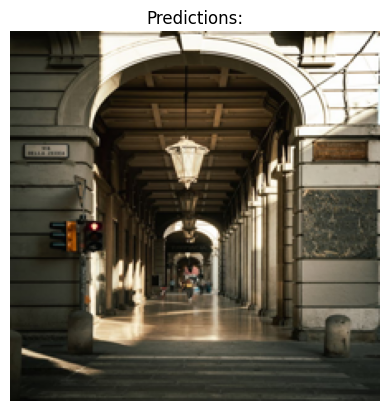

Top-3 Predictions:
1: prison (0.44)
2: vault (0.44)
3: palace (0.01)
Processing image: /content/sample_data/2.webp
1/1 [==============================] - 0s 60ms/step


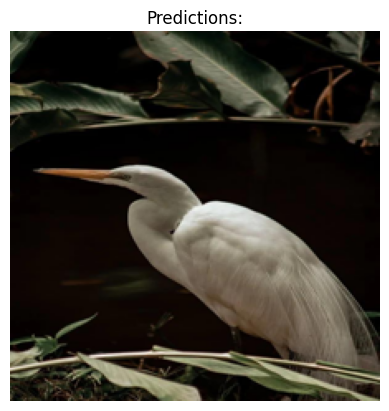

Top-3 Predictions:
1: American_egret (0.72)
2: little_blue_heron (0.07)
3: spoonbill (0.04)
Processing image: /content/sample_data/3.jpeg
1/1 [==============================] - 0s 55ms/step


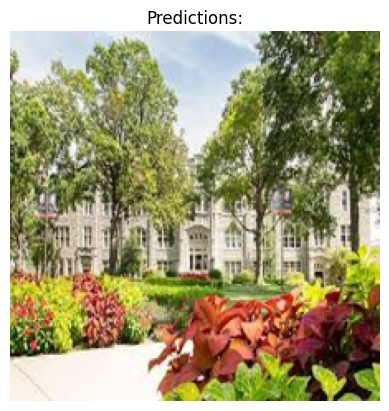

Top-3 Predictions:
1: pot (0.28)
2: lakeside (0.10)
3: patio (0.09)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import imageio

# Load the pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

# Function to convert image to a supported format (JPEG)
def convert_image(input_path, output_path, output_format='JPEG'):
    with Image.open(input_path) as img:
        img = img.convert('RGB')
        img.save(output_path, format=output_format)

# Function to load and preprocess an image
def load_and_preprocess_image(img_path):
    if not os.path.isfile(img_path):
        raise FileNotFoundError(f"Image file not found: {img_path}")

    try:
        img = Image.open(img_path)
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img = img.resize((224, 224))  # Resize to 224x224
    except IOError as e:
        raise IOError(f"Cannot open image file: {e}")

    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add a batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the image for MobileNetV2
    img_array = preprocess_input(img_array)
    return img_array, img

# Function to make a prediction
def predict(img_path):
    # Convert image if necessary
    if img_path.lower().endswith(('webp', 'avif')):
        converted_path = img_path.rsplit('.', 1)[0] + '_converted.jpg'
        convert_image(img_path, converted_path)
        img_path = converted_path

    # Preprocess the image
    img_array, img = load_and_preprocess_image(img_path)
    # Make a prediction
    predictions = model.predict(img_array)
    # Decode and get top-3 predictions
    decoded_predictions = decode_predictions(predictions, top=3)[0]
    return decoded_predictions, img

# List of image paths to process
image_paths = [
    '/content/sample_data/1.jpeg',
    '/content/sample_data/2.webp',
    '/content/sample_data/3.jpeg',
]

# Process each image and print results
for img_path in image_paths:
    try:
        print(f"Processing image: {img_path}")
        predictions, img = predict(img_path)
        # Display the image
        plt.imshow(img)
        plt.axis('off')
        plt.title('Predictions:')
        plt.show()
        # Print the predictions
        print("Top-3 Predictions:")
        for i, (imagenet_id, label, score) in enumerate(predictions):
            print(f"{i + 1}: {label} ({score:.2f})")
    except FileNotFoundError as e:
        print(e)
    except IOError as e:
        print(e)
